In [146]:
import numpy as np
import matplotlib.pyplot as plt

**Dieferenças Finitas na Equação de Poisson**

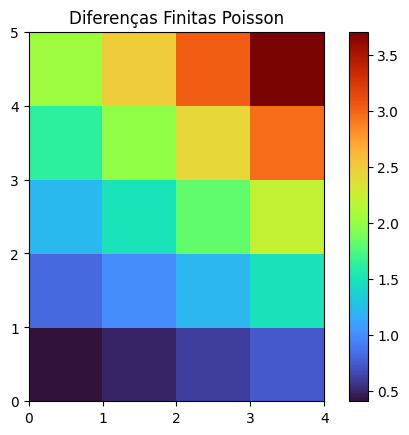

In [167]:
a, b = 0, 2  # Intervalo em x
c, d = 0, 1  # Intervalo em y

def f(x, y):
    return x * np.exp(y)

def g(x, y):
    if x == a: 
        return 0
    elif x == b:
        return 2 * np.exp(y)
    elif y == c:
        return x
    elif y == d:
        return np.e*x
    return 0  

def finite_difference(f, g, n, m, e = 1e-10, max_i = 1000):
    # Passo 1
    h = (b - a) / n
    k = (d - c) / m

    # Passo 2 e 3
    x = np.zeros(n)
    y = np.zeros(m)

    for i in range(n): x[i] = a + i*h
    for i in range(m): y[i] = c + i*k

    # Passo 4
    W = np.zeros((n+1, m+1))

    # Passo 5
    lamb = (h**2) / (k**2)
    u = 2 * (1 + lamb)

    # Passo 6
    for l in range(1, max_i + 1):

        # Passo 7
        z = (-(h**2) * f(x[1],y[m-1]) + g(a,y[m-1]) + lamb*g(x[1],d) + lamb * W[1,m-2] +  W[2,m-1]) / u
        norm = abs(z - W[1,m-1])    
        W[1,m-1] = z

        # Passo 8
        for i in range(2, n-1):
            z = (-(h**2) * f(x[i],y[m-1]) + lamb*g(x[i],d) + W[i-1,m-1] + W[i+1,m-1] + lamb*W[i,m-2]) / u
            if abs(z - W[i,m-1]) > norm:
                norm = abs(z - W[i,m-1])
            W[i,m-1] = z

        # Passo 9
        z = (-(h**2) * f(x[n-1],y[m-1]) + g(b,y[m-1]) + lamb*g(x[n-1],d) + W[n-2,m-1] +  lamb*W[n-1,m-2]) / u
        if abs(W[n-1,m-1] - z) > norm:
            norm = abs(W[n-1,m-1] - z)
        W[n-1,m-1] = z

        # Passo 10
        for j in range(m-2, 1,-1):

            # Passo 11
            z = (-(h**2) * f(x[1],y[j]) + g(a,y[j]) + lamb * W[1,j+1] + lamb * W[1,j-1] + W[2,j]) / u
            if abs(W[1,j] - z) > norm:
                norm = abs(W[1,j] - z)
            W[1,j] = z

            # Passo 12
            for i in range(2, n-1):
                z = (-(h**2) * f(x[i],y[j]) + W[i-1,j] + lamb * W[i,j+1] + W[i+1,j] + lamb * W[i,j-1]) / u
                if abs(W[i,j] - z) > norm:
                    norm = abs(W[i,j] - z)
                W[i,j] = z

            # Passo 13
            z = (-(h**2) * f(x[n-1],y[j]) + g(b,y[j]) + W[n-2,j] + lamb * W[n-1,j+1] + lamb * W[n-1,j-1]) / u
            if abs(W[n-1,j] - z) > norm:
                norm = abs(W[n-1,j] - z)
            W[n-1,j] = z

        # Passo 14
        z = (-(h**2) * f(x[1],y[1]) + g(a,y[1]) + lamb * g(x[1],c) + lamb * W[1,2] + W[2,1]) / u
        if abs(W[1,1] - z) > norm:
            norm = abs(W[1,1] - z)
        W[1,1] = z

        # Passo 15
        for i in range(2, n-1):
            z = (-(h**2) * f(x[i],y[1]) + lamb*g(x[i],c) + W[i-1,1] +  W[i+1,1] + lamb*W[i,2]) / u
            if abs(W[i,1] - z) > norm:
                norm = abs(z - W[i,1])
            W[i,1] = z
        
        # Passo 16
        z = (-(h**2) * f(x[n-1],y[1]) + g(b,y[1]) + lamb * g(x[n-1],c) + W[n-2,1] + lamb * W[n-1,2]) / u
        if abs(W[n-1,1] - z) > norm:
            norm = abs(W[n-1,1] - z)
        W[n-1,1] = z

        # Passo 17
        if norm <= e: break

        l+=1
    return W
    
n, m = 6, 5

w = finite_difference(f, g, n, m)

plt.title("Diferenças Finitas Poisson")
plt.pcolor(w[1:-1,1:-1],cmap='turbo')
plt.gca().set_aspect('equal')
plt.colorbar()
plt.show()

**Diferenças Regressivas na Equação do Calor**

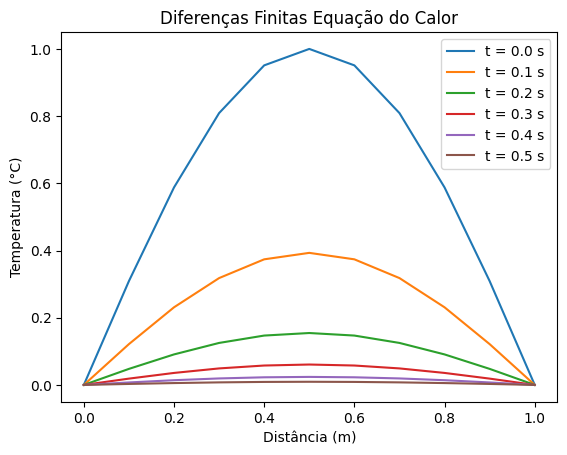

In [169]:
from scipy.linalg import solve_banded

def f(x):
    return np.sin(np.pi * x)

def backward_finite_difference(f, x, t, h, k, alpha, t0, tn):

    m = int(x / h) + 1 
    n = int(t / k) + 1
    lamb = (alpha**2 * k) / (h**2) 

    w = np.zeros((n , m ))

    for i in range(1, m - 1): w[0, i] = f(i * h)

    w[:, 0] = t0 
    w[:, -1] = tn

    A = np.zeros((3, m - 2))  
    A[1, :] = 1 + 2 * lamb 
    A[0, 1:] = -lamb  
    A[2, :-1] = -lamb 

    for i in range(0, n - 1):
        b = w[i, 1:m-1]
        b[0] += lamb * t0  
        b[-1] += lamb * tn  

        w[i + 1, 1:m-1] = solve_banded((1, 1), A, b)
    return w

l, T = 1 , 1
h, k = 0.1, 0.01
alpha = 1  
a, b = 0, 0  

w = backward_finite_difference(f, l, T, h, k, alpha, a, b)

intervalos = [i/10 for i in range(6)]  
for i in intervalos:
    j = int(i / k)
    plt.plot(np.linspace(0, l, int(l / h) + 1), w[j, :], label=f't = {i} s')

plt.xlabel('Distância (m)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.title('Diferenças Finitas Equação do Calor')
plt.show()

